Name: Xuanming Zhang

USC ID: 9018523660

b(i) Draw scatter plot.

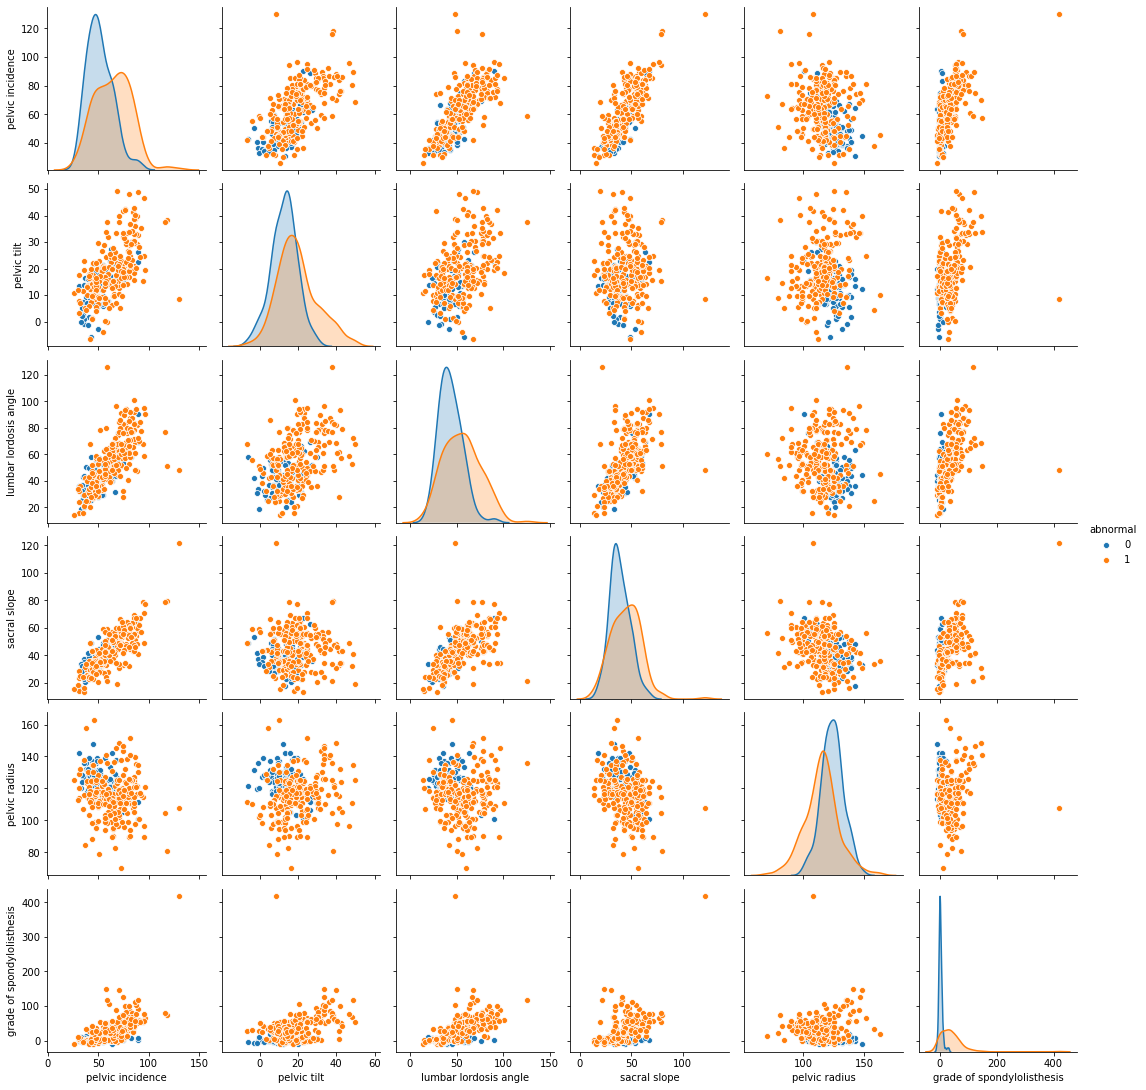

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

name_list=['pelvic incidence','pelvic tilt', 'lumbar lordosis angle','sacral slope', 'pelvic radius' , 'grade of spondylolisthesis','abnormal']
df = pd.read_csv("../data/vertebral_column_data/column_2C.dat",delimiter=' ',names=name_list)

#make a copy, and set the values in 'abnormal' to 1 or 0 as required.
dfc=df.copy()

abnormal_rows=dfc['abnormal']=='AB'
normal_rows=dfc['abnormal']=='NO'
dfc.loc[abnormal_rows,'abnormal']=1
dfc.loc[normal_rows,'abnormal']=0
dfc['abnormal'] = dfc['abnormal'].astype(int)

sns.pairplot(dfc,hue='abnormal')

b(ii) Draw Boxplot.

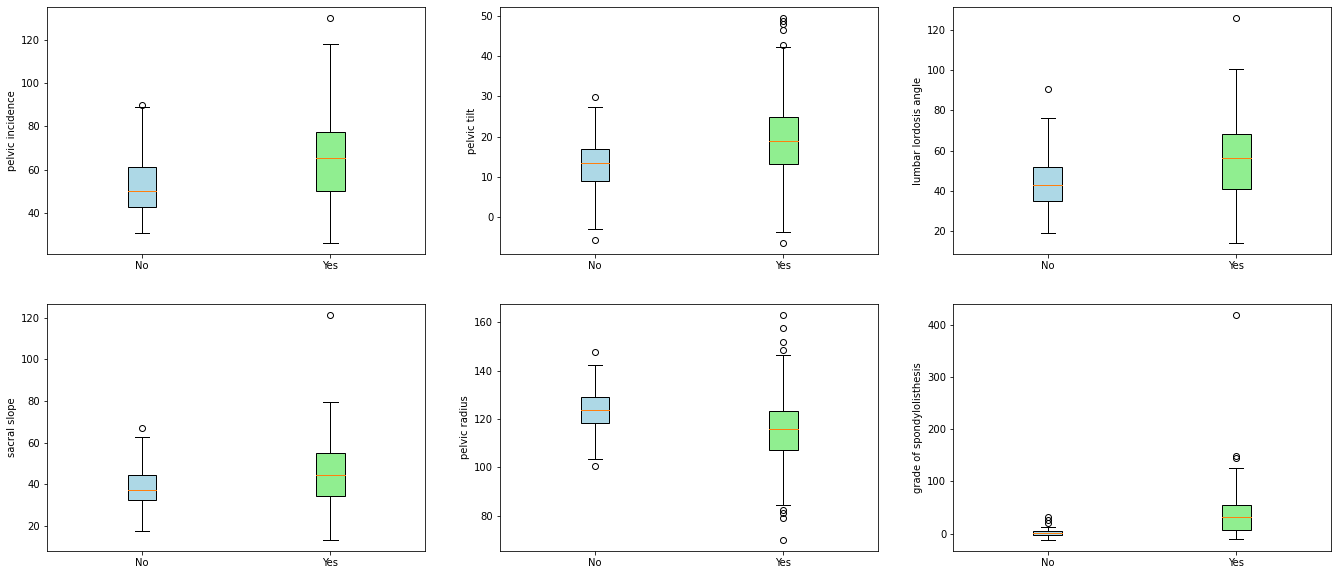

In [2]:
abnormal_data = dfc[abnormal_rows]
normal_data = dfc[normal_rows]

#initiate subplots
fig,axs = plt.subplots(2,3,figsize=(23,10))

#draw each subplot
label_names=['No','Yes']
bplot_list=[]
for i in range(2):
    for j in range(3):
        column_name = name_list[3*i+j]
        tmp_1 = abnormal_data[column_name]
        tmp_0 = normal_data[column_name]
        bplot = axs[i,j].boxplot([tmp_0,tmp_1],labels=label_names,patch_artist=True)
        bplot_list.append(bplot)
        
#paint different colors
colors = ['lightblue', 'lightgreen']
for bplot in bplot_list:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
#set different y_labels
for i,axs_row in enumerate(axs):
    for j,ax in enumerate(axs_row):
        ax.set_ylabel(name_list[3*i+j])
plt.show()

b(iii) get the training set and the test set.

In [3]:
#Create the training set and the test set.
training_data = pd.concat([normal_data[:70],abnormal_data[:140]],axis=0)
test_data = pd.concat([normal_data[70:],abnormal_data[140:]],axis=0)

training_features = training_data.iloc[:,:6]
training_target = training_data.iloc[:,6]

test_features = test_data.iloc[:,:6]
test_target = test_data.iloc[:,6]

c(i) Use sklearn package

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(training_features,training_target)
test_error = 1-knn.score(test_features,test_target)
training_error = 1-knn.score(training_features,training_target)
print(test_error)
print(training_error)

0.07999999999999996
0.10476190476190472


c(ii) Try to find the best k out of a group.

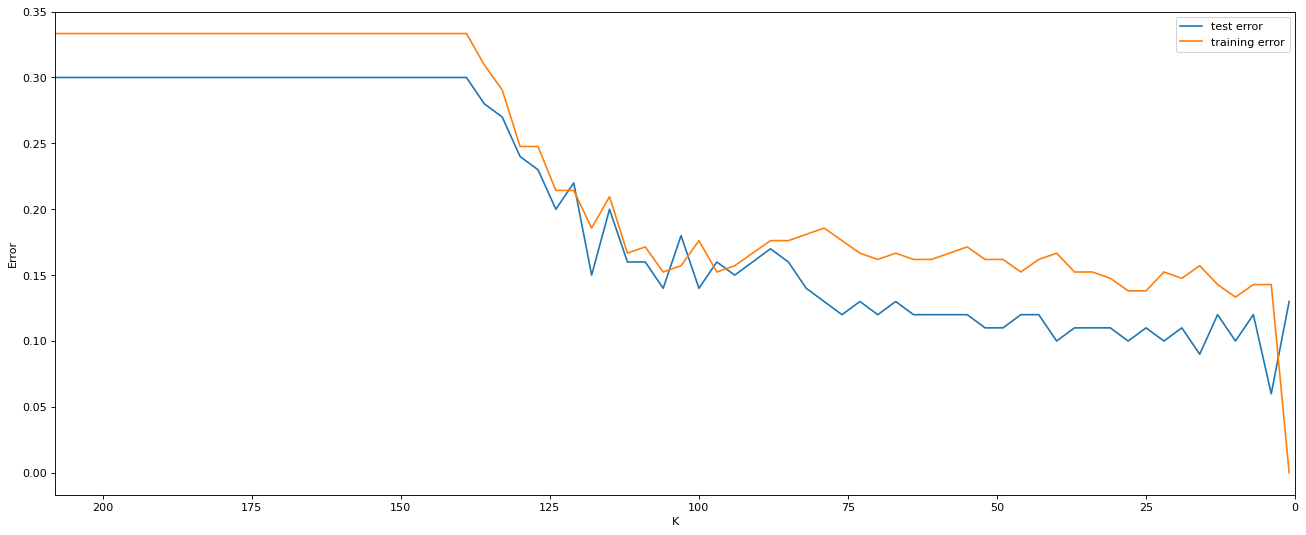

lowest_test_error is  0.06000000000000005
k* is  4
[[25  5]
 [ 1 69]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334
Precision: 0.932
Recall: 0.986
F1: 0.958


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

test_error_list = []
training_error_list = []
for i in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(training_features,training_target)
    test_error = 1-knn.score(test_features,test_target)
    training_error = 1-knn.score(training_features,training_target)
    test_error_list.append(test_error)
    training_error_list.append(training_error)

plt.figure(figsize=(20,8),dpi=80)
_k = [i for i in range(208,0,-3)]
plt.plot(_k,test_error_list,label="test error")
plt.plot(_k,training_error_list,label="training error")

plt.xlim((208,0))
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()

plt.show()

#k* and the lowest_test_error
lowest_test_error = min(test_error_list)
print("lowest_test_error is ",lowest_test_error)
print('k* is ',_k[test_error_list.index(lowest_test_error)])

#confusion matrix
knn_best = KNeighborsClassifier(n_neighbors=4,p=2)
knn_best.fit(training_features,training_target)
test_predict = knn_best.predict(test_features)
cf_matrix = confusion_matrix(test_target,test_predict)
print(cf_matrix)

tp = cf_matrix[1,1]
fp = cf_matrix[0,1]
tn = cf_matrix[0,0]
fn = cf_matrix[1,0]

print(classification_report(y_true=test_target, y_pred=test_predict))

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)

print("True Positive Rate: ",str(tpr))

print("True Negative Rate: ",str(tnr))

print('Precision: %.3f' % precision_score(y_true=test_target, y_pred=test_predict))

print('Recall: %.3f' % recall_score(y_true=test_target, y_pred=test_predict))

print('F1: %.3f' % f1_score(y_true=test_target, y_pred=test_predict))

c(iii) Change the size of N ,and find the most ideal N and K with lowest test rate.

The best N is 210
The best k in this N is 6.
The corresponding test error is 0.07999999999999996.
      N  Best k in N  Test Error
0    10            1        0.25
1    20            6        0.20
2    30            1        0.22
3    40           11        0.25
4    50           26        0.30
5    60           21        0.29
6    70           26        0.29
7    80           31        0.29
8    90           41        0.29
9   100            6        0.25
10  110            6        0.22
11  120           16        0.17
12  130           16        0.16
13  140           16        0.15
14  150           16        0.13
15  160            6        0.13
16  170            6        0.13
17  180            6        0.10
18  190            6        0.09
19  200            6        0.09
20  210            6        0.08


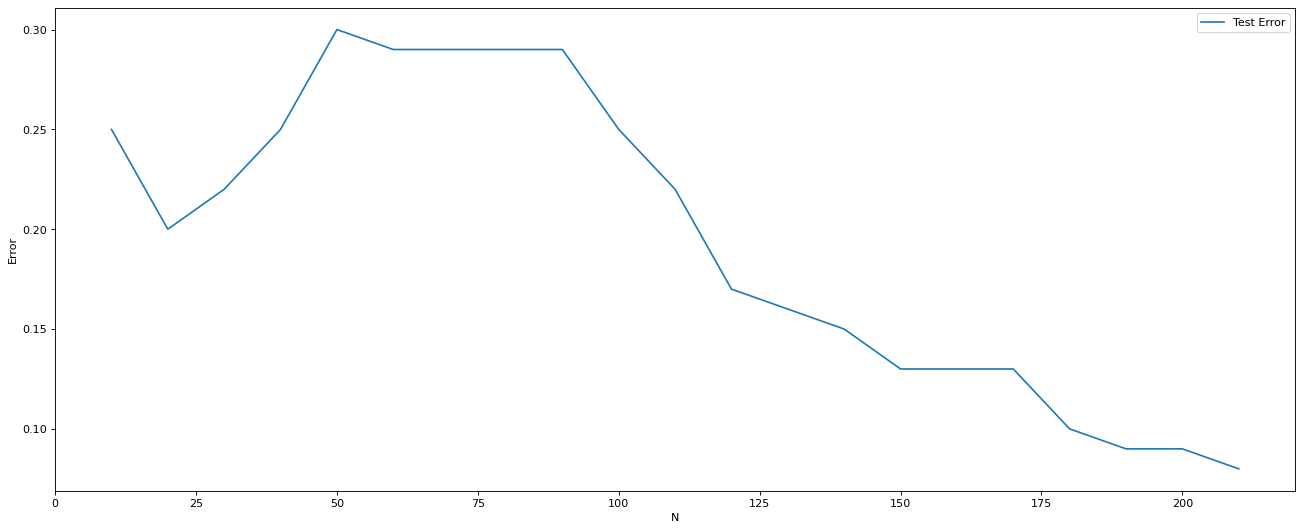

In [6]:
import collections
import numpy as np
import pandas as pd
new_test_error_list = []
d = collections.defaultdict(list)

for n in range(10,211,10):
    row_nums_0 = n//3
    row_nums_1 = n - row_nums_0
    
    n_training_data = pd.concat([normal_data[:row_nums_0], abnormal_data[:row_nums_1]], axis=0)
    
    n_training_features = n_training_data.iloc[:, :6]
    n_training_target = n_training_data.iloc[:, 6]
    
    n_test_error_list = []
    k_list = []
    
    for k in range(1,n,5):
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn.fit(n_training_features, n_training_target)
        
        n_test_error = 1 - knn.score(test_features, test_target)
        
        n_test_error_list.append(n_test_error)
        k_list.append(k)
        
    n_min_test_error = min(n_test_error_list)
    n_best_k = k_list[n_test_error_list.index(n_min_test_error)]
    
    d['N'].append(n)
    d['Best k in N'].append(n_best_k)
    d['Test Error'].append(n_min_test_error)
    
sum_up_info = pd.DataFrame(d)

sum_best_index = sum_up_info['Test Error'].argmin()
print("The best N is {}".format(sum_up_info.loc[sum_best_index,'N']))
print("The best k in this N is {}.".format(sum_up_info.loc[sum_best_index,"Best k in N"]))
print("The corresponding test error is {}.".format(sum_up_info.loc[sum_best_index,"Test Error"]))
print(sum_up_info)

#Draw the Learning Curve
plt.figure(figsize=(20,8),dpi=80)
plt.plot([i for i in range(10,211,10)],sum_up_info['Test Error'],label = 'Test Error')

plt.xlabel("N")
plt.ylabel("Error")
plt.legend()

plt.show()


d(i) Minkowski Distance with different p

In [7]:
import collections

# Create a dictionary to store inforamtion collected from different metrics
d_metric = collections.defaultdict(list)

# A.Manhattan Distance with p = 1
man_test_error_list = []
man_training_error_list = []
d_man = collections.defaultdict(list)

for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(training_features,training_target)
    
    man_test_error = 1-knn.score(test_features,test_target)
    man_training_error = 1-knn.score(training_features,training_target)
    
    d_man["K"].append(i)
    d_man["training error"].append(man_training_error)
    d_man["test error"].append(man_test_error)
    
df_man = pd.DataFrame(d_man)

man_test_min_error = df_man["test error"].min()
df_man_test_min_error = df_man[df_man["test error"]==man_test_min_error]
print("Manhattan Distance with the lowest test error:")
print(df_man_test_min_error)

# We can get the lowest test error when k in [6,11,26], so we have to take training error into consideration.
# Since the training error when k equals 6 is the smallest, we choose this 6 as k*.

d_metric['Metric'].append("Manhattan")
d_metric['Best K'].append(6)
d_metric['Lowest Test Error'].append(man_test_min_error)

# B.Minkowski Distance
lg_p_list =[i/10 for i in range(1,11)]
d_mink=collections.defaultdict(list)
for lg_p in lg_p_list:
    knn = KNeighborsClassifier(n_neighbors=6,p=10**lg_p)
    knn.fit(training_features,training_target)
    
    mink_test_error = 1-knn.score(test_features,test_target)
    mink_training_error = 1-knn.score(training_features,training_target)
    
    d_mink["log(10)p"].append(lg_p)
    d_mink["training error"].append(mink_training_error)
    d_mink["test error"].append(mink_test_error)
df_mink = pd.DataFrame(d_mink)
mink_test_min_error = df_mink["test error"].min()
df_mink_test_min_error = df_mink[df_mink["test error"]==mink_test_min_error]
print()
print("Minkowski Distance with the lowest test error:")
print(df_mink_test_min_error)

d_metric['Metric'].append("Minkowski")
d_metric['Best K'].append(6)
d_metric['Lowest Test Error'].append(mink_test_min_error)

# C. Chebyshev Distance with p → ∞
che_test_error_list = []
che_training_error_list = []
d_che = collections.defaultdict(list)

for i in range(1,197,5):
    knn = KNeighborsClassifier(n_neighbors=i,p=float("inf"))
    knn.fit(training_features,training_target)
    
    che_test_error = 1-knn.score(test_features,test_target)
    che_training_error = 1-knn.score(training_features,training_target)
    
    d_che["K"].append(i)
    d_che["training error"].append(che_training_error)
    d_che["test error"].append(che_test_error)
    
df_che = pd.DataFrame(d_che)

che_test_min_error = df_che["test error"].min()
df_che_test_min_error = df_che[df_che["test error"]==che_test_min_error]
print()
print("Chebyshev Distance with the lowest test error")
print(df_che_test_min_error)

d_metric['Metric'].append("Chebyshev")
d_metric['Best K'].append(16)
d_metric['Lowest Test Error'].append(che_test_min_error)

Manhattan Distance with the lowest test error:
    K  training error  test error
1   6        0.138095        0.11
2  11        0.142857        0.11
5  26        0.166667        0.11

Minkowski Distance with the lowest test error:
   log(10)p  training error  test error
5       0.6        0.152381        0.06

Chebyshev Distance with the lowest test error
    K  training error  test error
3  16        0.147619        0.08


A. k* is 6, test error is 0.11.

B. The best log(10)p is 0.6.

C. k* is 16, test error is 0.08.

d(ii)Mahalanobis Distance

In [8]:
maha_test_error_list = []
maha_training_error_list = []
d_maha = collections.defaultdict(list)
covariance_matrix = np.matrix(np.cov(training_features, rowvar=False))
for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis',
                               metric_params={"VI":covariance_matrix.I})
    knn.fit(training_features, training_target)

    maha_test_error = 1 - knn.score(test_features, test_target)
    maha_training_error = 1 - knn.score(training_features, training_target)

    d_maha["K"].append(i)
    d_maha["training error"].append(maha_training_error)
    d_maha["test error"].append(maha_test_error)

df_maha = pd.DataFrame(d_maha)

maha_test_min_error = df_maha["test error"].min()
df_maha_test_min_error = df_maha[df_maha["test error"] == maha_test_min_error]
print()
print("mahabyshev Distance with the lowest test error")
print(df_maha_test_min_error)

d_metric['Metric'].append("Mahalanobis")
d_metric['Best K'].append(1)
d_metric['Lowest Test Error'].append(maha_test_min_error)


mahabyshev Distance with the lowest test error
   K  training error  test error
0  1        0.000000        0.17
1  6        0.119048        0.17


In [9]:
#Sum up question d
df_metric = pd.DataFrame(d_metric)
print(df_metric)

        Metric  Best K  Lowest Test Error
0    Manhattan       6               0.11
1    Minkowski       6               0.06
2    Chebyshev      16               0.08
3  Mahalanobis       1               0.17


e. weighted decision

In [10]:
# A.Euclidean Distance with p = 2
ecu_w_test_error_list = []
ecu_w_training_error_list = []
d_ecu_w = collections.defaultdict(list)

for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',p=2)
    knn.fit(training_features, training_target)

    ecu_w_test_error = 1 - knn.score(test_features, test_target)
    ecu_w_training_error = 1 - knn.score(training_features, training_target)

    d_ecu_w["K"].append(i)
    d_ecu_w["training error"].append(ecu_w_training_error)
    d_ecu_w["test error"].append(ecu_w_test_error)

df_ecu_w = pd.DataFrame(d_ecu_w)

ecu_w_test_min_error = df_ecu_w["test error"].min()
df_ecu_w_test_min_error = df_ecu_w[df_ecu_w["test error"] == ecu_w_test_min_error]
print("Euclidean Distance with the lowest test error:")
print(df_ecu_w_test_min_error)


# B.Manhattan Distance with p = 1
man_w_test_error_list = []
man_w_training_error_list = []
d_man_w = collections.defaultdict(list)

for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',p=1)
    knn.fit(training_features, training_target)

    man_w_test_error = 1 - knn.score(test_features, test_target)
    man_w_training_error = 1 - knn.score(training_features, training_target)

    d_man_w["K"].append(i)
    d_man_w["training error"].append(man_w_training_error)
    d_man_w["test error"].append(man_w_test_error)

df_man_w = pd.DataFrame(d_man_w)

man_w_test_min_error = df_man_w["test error"].min()
df_man_w_test_min_error = df_man_w[df_man_w["test error"] == man_w_test_min_error]
print()
print("Manhattan Distance with the best test error:")
print(df_man_w_test_min_error)

# Chebyshev Distance with p = inf
che_w_test_error_list = []
che_w_training_error_list = []
d_che_w = collections.defaultdict(list)

for i in range(1, 197, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', p=float("inf"))
    knn.fit(training_features, training_target)

    che_w_test_error = 1 - knn.score(test_features, test_target)
    che_w_training_error = 1 - knn.score(training_features, training_target)

    d_che_w["K"].append(i)
    d_che_w["training error"].append(che_w_training_error)
    d_che_w["test error"].append(che_w_test_error)

df_che_w = pd.DataFrame(d_che_w)

che_w_test_min_error = df_che_w["test error"].min()
df_che_w_test_min_error = df_che_w[df_che_w["test error"] == che_w_test_min_error]
print()
print("Chebyshev Distance with the best test error:")
print(df_che_w_test_min_error)

Euclidean Distance with the lowest test error:
   K  training error  test error
1  6             0.0         0.1

Manhattan Distance with the best test error:
    K  training error  test error
5  26             0.0         0.1

Chebyshev Distance with the best test error:
     K  training error  test error
3   16             0.0        0.11
6   31             0.0        0.11
7   36             0.0        0.11
8   41             0.0        0.11
12  61             0.0        0.11


With Euclidean Distance, the best test error is 0.1 when k is 6.

With Manhattan Distance, the best test error is 0.1 when k is 26.

With Chebyshev Distance, the best test error is 0.11 when k is 16,31,36,41,61.

The overall best test error is 0.1.

f. The lowest training error rate I achieved is 0.